In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [29]:
earthquakes = pd.read_csv("earthquake.csv")
landslides = pd.read_csv("catalog.csv")

In [30]:
np.random.seed(0)

### Take a look at the data

In [31]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [32]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

__dtype: object__ --> For Pandas, "object" is for string data type. Therefore, this means Python doesn't percieve these values in 'Date' column as __dateime64__ data type object.

In [33]:
# check data type without printing out rows 
earthquakes['Date'].dtype

dtype('O')

In [34]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [35]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

### Convert data type from object --> datetime; "parsing dates" 

In [37]:
# parsing dates by creating a new column
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = '%m/%d/%y')

In [38]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [39]:
landslides['date_parsed'].head() # the new 'date_parsed' col's data type is datetime64

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [40]:
# if date column values are in multiple format and caused error from code above use below:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format = True)

In [41]:
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

### Select just the day of the month from our column

In [ ]:
# using 'date' column which is string type data with dt.day causes errorlol
dom_landslides = landslides['date'].dt.day

In [43]:
# have to use with datetime-like data type
dom_landslides = landslides['date_parsed'].dt.day

In [47]:
dom_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

### Plot the day of the month to check the date parsing has done correctly without mixing up the months and days.
- create a histogram 
    - if parsing has been done correctly, x-axis should range(1, 32)
    - since there is no particular days that landslide happens, it should be evenly distributed with a dip on 31 since only some months have 31 days

In [48]:
# remove nulls
dom_landslides_delNull = dom_landslides.dropna()

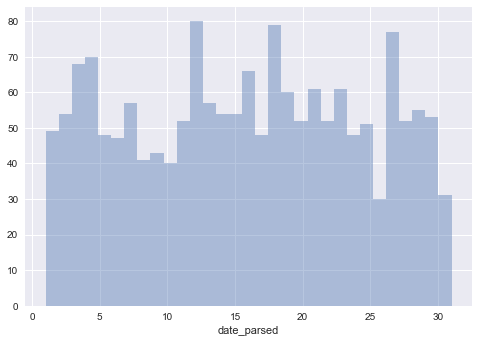

In [50]:
# plot
sns.distplot(dom_landslides_delNull, kde = False, bins = 31)
sns.plt.show()

### More visualization

__line plot visualization__

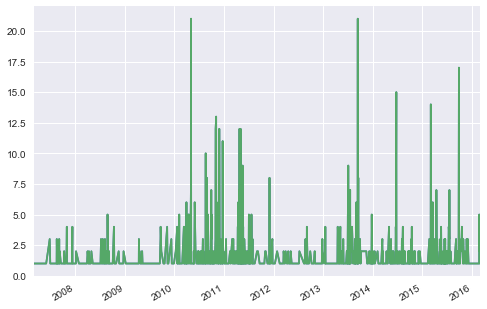

In [61]:
landslides['date_parsed'].value_counts().sort_values().plot.line()
sns.plt.show()

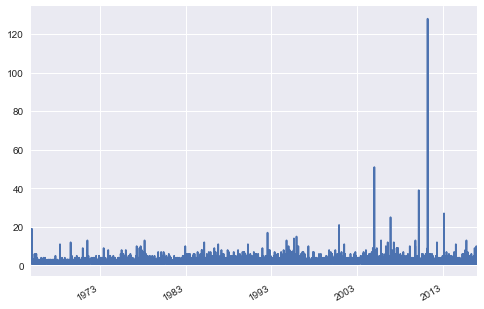

In [62]:
earthquakes['date_parsed'].value_counts().sort_values().plot.line()
sns.plt.show()